In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Read dataset (downloaded from Kaggle https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction on 12.02.2022)
# Ownership of dataset with original authors of research article
company_data = pd.read_csv('Company_Bankruptcy_Data.csv')

In [3]:
# Preview of dataset
company_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
# Cleaning column names
# Rename first column to remove '?'
company_data = company_data.rename(columns={'Bankrupt?': 'Bankrupt'})
# Trim column names
company_data.columns = company_data.columns.str.strip()

In [5]:
# Determine Dataset dimensions
print("The dataset has a dimension (rows x columns) of " + str(company_data.shape))

The dataset has a dimension (rows x columns) of (6819, 96)


In [6]:
# Show all column names with data types
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt                                                 6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [7]:
# Summarize data types
company_data.dtypes.value_counts()

float64    93
int64       3
dtype: int64

In [8]:
# Check for missing values
print("The dataset has " + str((company_data.isna().sum()).sum()) + " missing values")

The dataset has 0 missing values


In [9]:
# Get information about columns
pd.set_option('display.max_columns', None)
company_data.describe()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115

In [10]:
# Dataset consists of 93 financial ratios (float64) and 3 binary classifications (int64)
# 3 columns with binary classification ("Bankrupt", "Net Income Flag", "Liability-Assets Flag") to deal with first:

In [11]:
# Column "Net Income Flag": According to the dataset explanation, a "Net Income Flag" of 1 refers to a financial loss in 
# past two years. It is unlikely that this applies to all companies in the dataset as many financial profit ratios 
# show positive values, therefore this feature is removed. I also didn't find an explanation that e.g. only companies
# with a loss in the past have been selected
company_data = company_data.drop('Net Income Flag', axis='columns')

In [12]:
# Column "Liability-Assets Flag": Acccording to the dataset description, this is a flag that should demonstrate
# overindebtedness according to the dataset legend, where liabilities exceed the available assets which is an indicator of 
# bankruptcy

In [13]:
# Count "Liability-Assets Flag" flag entries
company_data.groupby("Liability-Assets Flag")["Liability-Assets Flag"].count()

Liability-Assets Flag
0    6811
1       8
Name: Liability-Assets Flag, dtype: int64

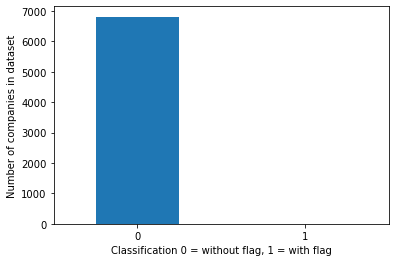

In [14]:
# Create bar chart to show companies
output_barchart = company_data.groupby("Liability-Assets Flag")["Liability-Assets Flag"].count().plot.bar \
(xlabel='Classification 0 = without flag, 1 = with flag', ylabel='Number of companies in dataset', rot=0)

In [15]:
# Count companies with liability-asset flag and bankrupt classification
company_data[['Liability-Assets Flag','Bankrupt']].value_counts()

Liability-Assets Flag  Bankrupt
0                      0           6597
                       1            214
1                      1              6
                       0              2
dtype: int64

In [16]:
# Strangely most bankrupt companies don't have a set liability-asset flag. However it could be expected that a bankrupt
# company shows overindebtness. Here only 6 companies have this flag. I removed this flag as a consequence as it seems 
# not to be correct.
company_data = company_data.drop('Liability-Assets Flag', axis='columns')

In [17]:
# Column "Bankrupt": Show number of non-bankrupt (value = 0) and bankrupt (value = 1) companies
company_data.groupby("Bankrupt")["Bankrupt"].count()

Bankrupt
0    6599
1     220
Name: Bankrupt, dtype: int64

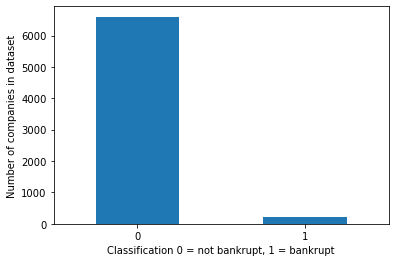

In [18]:
# Create bar chart to show non-bankrupt and bankrupt companies
output_barchart = company_data.groupby("Bankrupt")["Bankrupt"].count().plot.bar \
(xlabel='Classification 0 = not bankrupt, 1 = bankrupt', ylabel='Number of companies in dataset', rot=0)

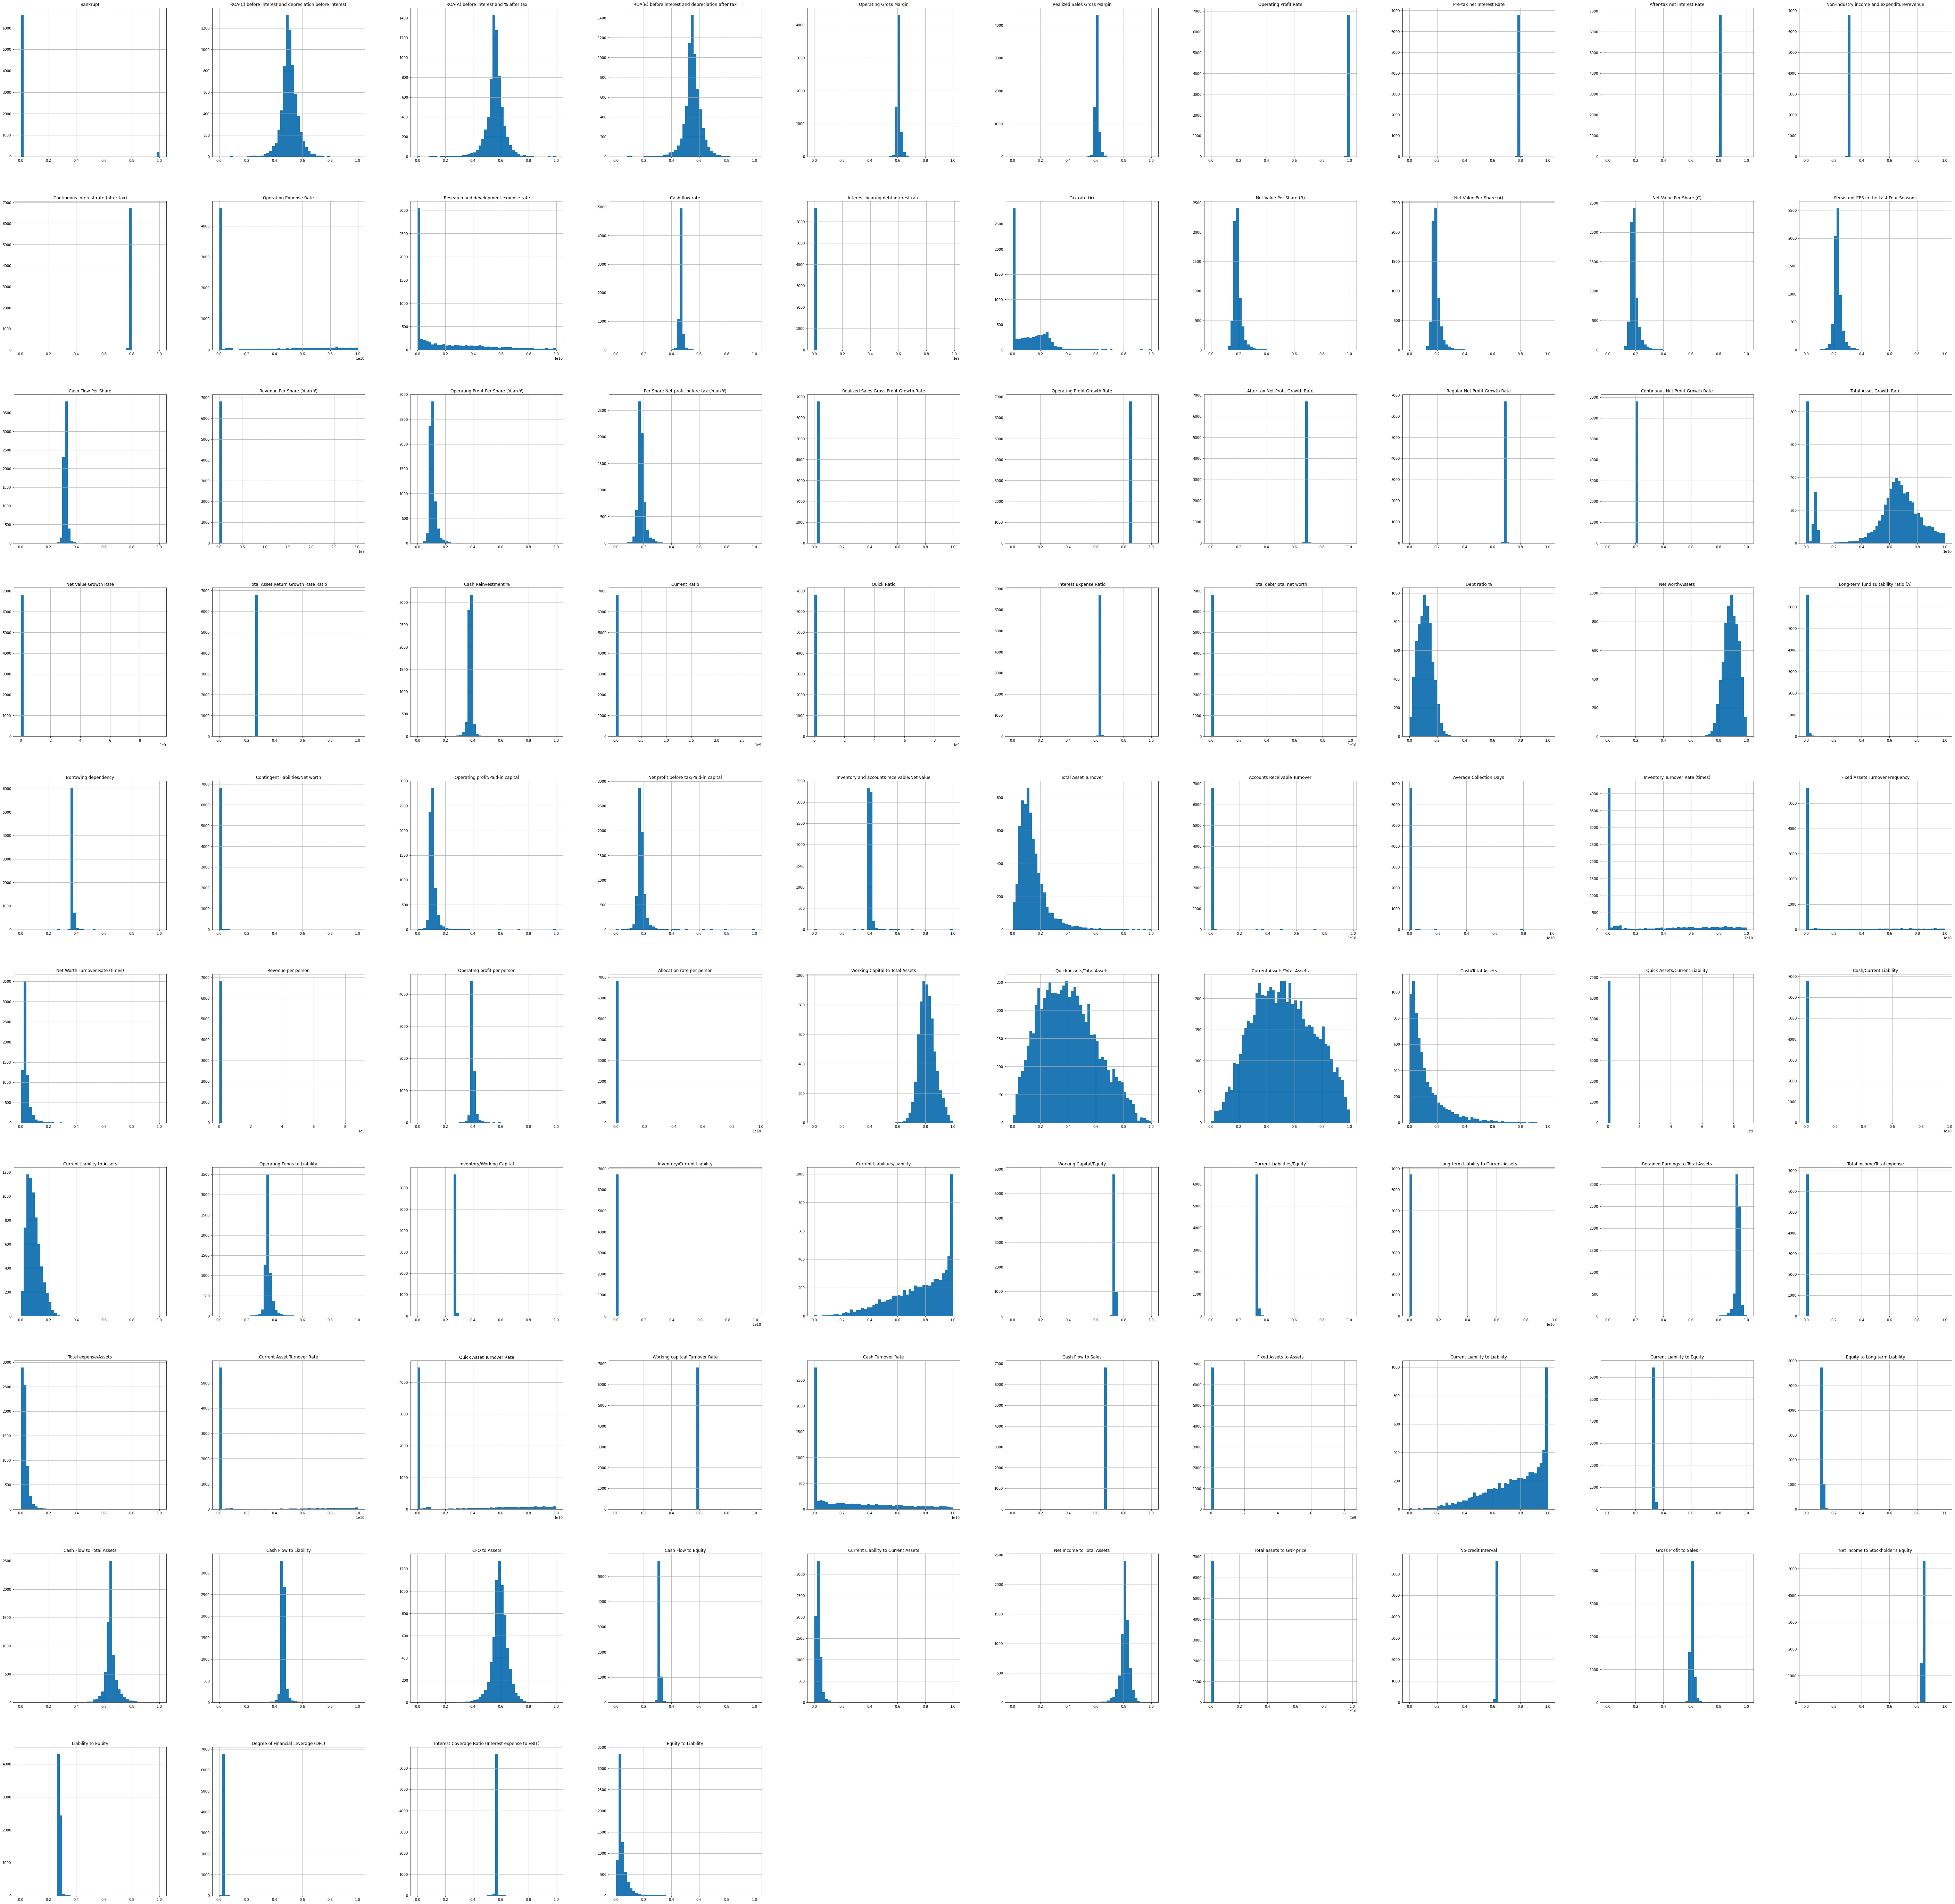

In [19]:
# Show dataset column values in Histogramm
output_histogram = company_data.hist(figsize = (100,100), bins = 50)

In [20]:
# Many ratios seem to have outliers and partially are skewed so for a potential prediction model this would need to 
# be considered. In any case cleaning is nessary to avoid false correlation results. 

In [21]:
# Since most column ranges are between 0 and 1, analyze columns with larger outliers
for column in company_data:
    if (company_data[column].max() > 1):
        print (column + " with max: " + str(company_data[column].max()))

Operating Expense Rate with max: 9990000000.0
Research and development expense rate with max: 9980000000.0
Interest-bearing debt interest rate with max: 990000000.0
Revenue Per Share (Yuan ¥) with max: 3020000000.0
Total Asset Growth Rate with max: 9990000000.0
Net Value Growth Rate with max: 9330000000.0
Current Ratio with max: 2750000000.0
Quick Ratio with max: 9230000000.0
Total debt/Total net worth with max: 9940000000.0
Accounts Receivable Turnover with max: 9740000000.0
Average Collection Days with max: 9730000000.0
Inventory Turnover Rate (times) with max: 9990000000.0
Fixed Assets Turnover Frequency with max: 9990000000.0
Revenue per person with max: 8810000000.0
Allocation rate per person with max: 9570000000.0
Quick Assets/Current Liability with max: 8820000000.0
Cash/Current Liability with max: 9650000000.0
Inventory/Current Liability with max: 9910000000.0
Long-term Liability to Current Assets with max: 9540000000.0
Current Asset Turnover Rate with max: 10000000000.0
Quick 

In [22]:
# Function to remove outliers from columns with 0.01 and 0.99 quantile
# see https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
def remove_outliers(column, data):   
    
    company_data_low = data[column].quantile(0.01)
    company_data_hi  = data[column].quantile(0.99)

    company_data_filtered = data[(data[column] < company_data_hi) & (data[column] > company_data_low)]
    return company_data_filtered      

In [23]:
# Remove outliers in for loop:
for column in company_data:
    if (company_data[column].max() > 1):
        company_data = remove_outliers(column, company_data)        

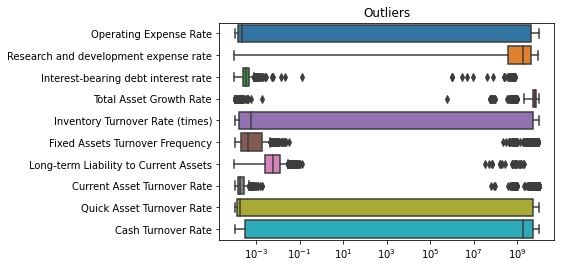

<Figure size 1440x1440 with 0 Axes>

In [24]:
# Test results with boxplot
columnList = []
outlierFrame = pd.DataFrame()
for column in company_data:
    if (company_data[column].max() > 1):
        columnList.append(column)    
outlierFrame = company_data[columnList]

# Horizontal boxplot
# method from https://seaborn.pydata.org/examples/horizontal_boxplot.html
ax = sns.boxplot(data = outlierFrame, orient="h")
ax.set_title('Outliers')
ax.set(xscale="log")
plt.figure(figsize = (20,20))
plt.show()

In [25]:
# Decision to drop Research and development and interest-bearing debit interest rate as values are not in line with typical
# R&D or interest rates (1-20%) if the company is not a pure research lab.
# Decision to drop asset-related rates as many values have a dimension of 10^7 and higher which seems unrealistic
# Decision not to drop the "Cash Turnover Rate" (Annual Revenue / Cash Balance) as bankrupt companies often have no cash which
# leads to high cash turnover ratios

In [26]:
# Drop the columns
for column in company_data:
    if (company_data[column].max() > 1 and column != "Cash Turnover Rate"):
        company_data = company_data.drop(column, axis='columns')

In [27]:
# Correlation overview between all ratios
company_data_correlation = company_data.corr()
company_data_correlation.style.background_gradient(cmap='seismic')

In [28]:
# Research Question 1: Are there (strong) correlations between bankruptcy of a company and the financial ratios in the dataset
# Look for (strong) correlations between Bankruptcy column and other columns.
for column in company_data:
    correlation = company_data['Bankrupt'].corr(company_data[column])
    if (abs(correlation) > 0.25):
        print("Correlation for " + column + " with a value of " + str(round(correlation,2)))

Correlation for Bankrupt with a value of 1.0
Correlation for ROA(C) before interest and depreciation before interest with a value of -0.25
Correlation for ROA(A) before interest and % after tax with a value of -0.26
Correlation for ROA(B) before interest and depreciation after tax with a value of -0.26
Correlation for Total debt/Total net worth with a value of 0.26
Correlation for Borrowing dependency with a value of 0.26
Correlation for Current Liabilities/Equity with a value of 0.25
Correlation for Current Liability to Equity with a value of 0.25
Correlation for Net Income to Total Assets with a value of -0.3
Correlation for Net Income to Stockholder's Equity with a value of -0.31


In [29]:
# Answer Question 1: No strong correlation (> 0.5) found. Found 5 negative correlations and 4 positive correlation between 
# column 'Bankrupt' and the financial ratios. The range in absolute terms is between 0.25 and 0.31. Correlations less than 
# 0.25 are not considered as significant.

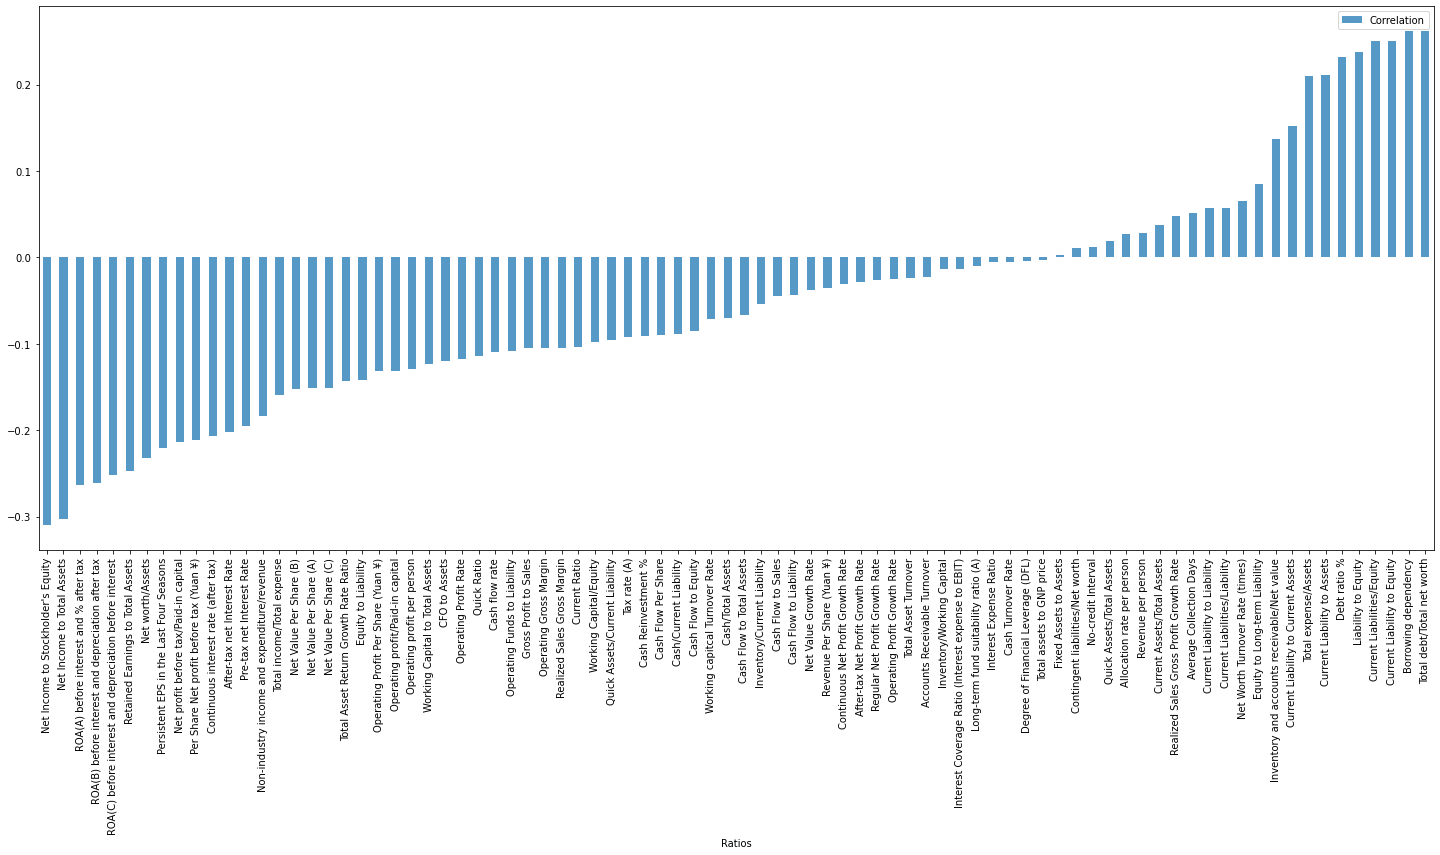

In [30]:
# Show correlation findings in plot (with all other correlations):
company_data_correlation = company_data.corrwith(company_data['Bankrupt'])
company_data_correlation = company_data_correlation.drop(labels=['Bankrupt'])
company_data_correlation = company_data_correlation.sort_values(ascending=True)
correlation_frame = pd.DataFrame({'Ratios':company_data_correlation.index, 'Correlation':company_data_correlation.values})
correlation_frame.set_index(["Ratios"],inplace=True)
correlation_frame.plot(kind='bar',alpha=0.75, rot=90, figsize=(25,10))
plt.show()

In [31]:
# Research Question 2: What financial ratios correlate to each other for the bankrupt companies?
# Create dataframe subset with only bankrupt companies
company_data_only_bankrupt_companies = company_data[company_data["Bankrupt"] == 1]
# Drop Bankrupt column as not needed for this analysis
company_data_only_bankrupt_companies = company_data_only_bankrupt_companies.drop('Bankrupt', axis='columns')
company_data_only_bankrupt_companies_correlation = company_data_only_bankrupt_companies.corr()
company_data_only_bankrupt_companies_correlation.style.background_gradient(cmap='seismic')

In [32]:
# Determine only very strong correlations > 0.75 numerically since there are many correlations between variables
counter = 0
for column1 in company_data_only_bankrupt_companies:
    for column2 in company_data_only_bankrupt_companies:
        if (column1 != column2):
            correlation = company_data_only_bankrupt_companies[column1].corr(company_data_only_bankrupt_companies[column2])
            if (abs(correlation) > 0.75 and abs(correlation) < 1):
                counter = counter + 1
                print("Correlation between " + column1  + " and  " + column2 + " is: "+ str(round(correlation,2)))

print("Strong correlations for " + str(counter/2) + " financial ratios")                

Correlation between ROA(C) before interest and depreciation before interest and  ROA(A) before interest and % after tax is: 0.96
Correlation between ROA(C) before interest and depreciation before interest and  ROA(B) before interest and depreciation after tax is: 0.99
Correlation between ROA(C) before interest and depreciation before interest and  Persistent EPS in the Last Four Seasons is: 0.9
Correlation between ROA(C) before interest and depreciation before interest and  Per Share Net profit before tax (Yuan ¥) is: 0.88
Correlation between ROA(C) before interest and depreciation before interest and  Total Asset Return Growth Rate Ratio is: 0.83
Correlation between ROA(C) before interest and depreciation before interest and  Net profit before tax/Paid-in capital is: 0.88
Correlation between ROA(C) before interest and depreciation before interest and  Operating profit per person is: 0.76
Correlation between ROA(C) before interest and depreciation before interest and  Retained Earnings

Correlation between After-tax Net Profit Growth Rate and  Regular Net Profit Growth Rate is: 0.97
Correlation between After-tax Net Profit Growth Rate and  Continuous Net Profit Growth Rate is: 0.9
Correlation between Regular Net Profit Growth Rate and  After-tax Net Profit Growth Rate is: 0.97
Correlation between Regular Net Profit Growth Rate and  Continuous Net Profit Growth Rate is: 0.9
Correlation between Continuous Net Profit Growth Rate and  After-tax Net Profit Growth Rate is: 0.9
Correlation between Continuous Net Profit Growth Rate and  Regular Net Profit Growth Rate is: 0.9
Correlation between Net Value Growth Rate and  Persistent EPS in the Last Four Seasons is: 0.84
Correlation between Net Value Growth Rate and  Per Share Net profit before tax (Yuan ¥) is: 0.75
Correlation between Net Value Growth Rate and  Net profit before tax/Paid-in capital is: 0.78
Correlation between Net Value Growth Rate and  Retained Earnings to Total Assets is: 0.76
Correlation between Total Asset

Correlation between Current Liability to Equity and  Current Liability to Assets is: 0.83
Correlation between Current Liability to Equity and  Current Liabilities/Equity is: 1.0
Correlation between Current Liability to Equity and  Liability to Equity is: 0.9
Correlation between Cash Flow to Total Assets and  Cash Flow to Liability is: 0.97
Correlation between Cash Flow to Total Assets and  Cash Flow to Equity is: 0.97
Correlation between Cash Flow to Liability and  Cash Flow to Total Assets is: 0.97
Correlation between Cash Flow to Liability and  Cash Flow to Equity is: 0.89
Correlation between CFO to Assets and  Cash flow rate is: 0.89
Correlation between CFO to Assets and  Cash Flow Per Share is: 0.9
Correlation between CFO to Assets and  Cash Reinvestment % is: 0.97
Correlation between CFO to Assets and  Operating Funds to Liability is: 0.94
Correlation between Cash Flow to Equity and  Cash Flow to Total Assets is: 0.97
Correlation between Cash Flow to Equity and  Cash Flow to Liabi

In [33]:
# Answer Question 2: Very strong correlations (partially negative) for 60 financial ratios. Several ratios seem to be identical or vary
# only slightly with regard to the financial key figures used to calculate the ratios

In [34]:
# Research Question 3: How do the 9 finacial ratios from question 1 behave for the non-bankrupt companies in the 
# dataset - compared to the bankrupt companies?

In [35]:
# Answer Question 3.1:

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2364.0,0.559405,0.051553,0.162778,0.538187,0.559693,0.585614,0.875600
1,64.0,0.468532,0.096728,0.121511,0.448771,0.493295,0.529410,0.574466


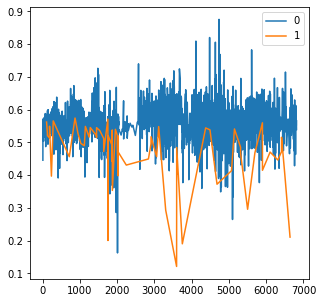

In [36]:
company_data.groupby('Bankrupt')['ROA(A) before interest and % after tax'].plot(legend=True, figsize=(5,5))
company_data.groupby('Bankrupt')['ROA(A) before interest and % after tax'].describe()

In [37]:
# Answer Question 3.2:

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2364.0,0.556762,0.048996,0.206756,0.531720,0.555196,0.581990,0.869158
1,64.0,0.471401,0.089441,0.112212,0.446009,0.500241,0.528521,0.564645


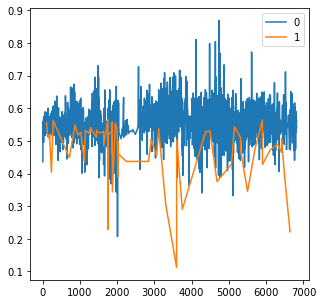

In [38]:
company_data.groupby('Bankrupt')['ROA(B) before interest and depreciation after tax'].plot(legend=True, figsize=(5,5))
company_data.groupby('Bankrupt')['ROA(B) before interest and depreciation after tax'].describe()

In [39]:
# Answer Question 3.3:

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2364.0,0.507980,0.048715,0.231365,0.481292,0.505289,0.533540,0.780139
1,64.0,0.426865,0.082196,0.102325,0.394725,0.450446,0.477112,0.519817


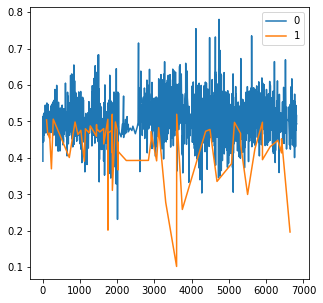

In [40]:
company_data.groupby('Bankrupt')['ROA(C) before interest and depreciation before interest'].plot(legend=True, figsize=(5,5))
company_data.groupby('Bankrupt')['ROA(C) before interest and depreciation before interest'].describe()

In [41]:
# Answer Question 3.4:

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2364.0,0.007368,0.004502,0.000991,0.004222,0.006365,0.009256,0.032271
1,64.0,0.015094,0.006419,0.002629,0.010917,0.014598,0.018755,0.029687


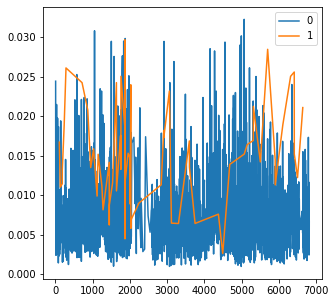

In [42]:
company_data.groupby('Bankrupt')['Total debt/Total net worth'].plot(legend=True, figsize=(5,5))
company_data.groupby('Bankrupt')['Total debt/Total net worth'].describe()

In [43]:
# Answer Question 3.5:

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2364.0,0.374728,0.003990,0.369637,0.371858,0.373876,0.376654,0.402183
1,64.0,0.381621,0.006397,0.357056,0.378190,0.381095,0.385204,0.395561


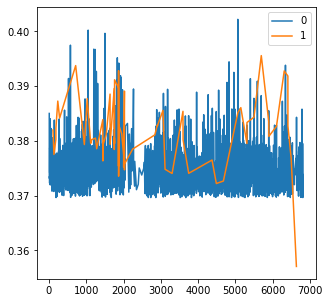

In [44]:
company_data.groupby('Bankrupt')['Borrowing dependency'].plot(legend=True, figsize=(5,5))
company_data.groupby('Bankrupt')['Borrowing dependency'].describe()

In [45]:
# Answer Question 3.6:

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2364.0,0.330804,0.003277,0.326508,0.328539,0.329976,0.332083,0.351043
1,64.0,0.336240,0.005627,0.320395,0.331887,0.335954,0.339448,0.349056


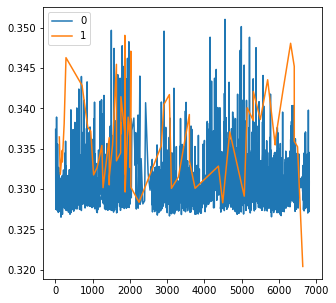

In [46]:
company_data.groupby('Bankrupt')['Current Liabilities/Equity'].plot(legend=True, figsize=(5,5))
company_data.groupby('Bankrupt')['Current Liabilities/Equity'].describe()

In [47]:
# Answer Question 3.7:

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2364.0,0.330804,0.003277,0.326508,0.328539,0.329976,0.332083,0.351043
1,64.0,0.336240,0.005627,0.320395,0.331887,0.335954,0.339448,0.349056


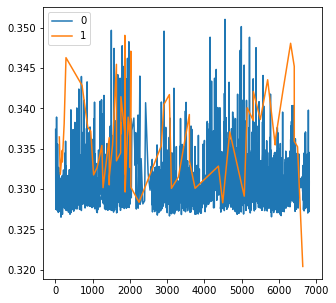

In [48]:
company_data.groupby('Bankrupt')['Current Liability to Equity'].plot(legend=True, figsize=(5,5))
company_data.groupby('Bankrupt')['Current Liability to Equity'].describe()

In [49]:
# Answer Question 3.8:

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2364.0,0.808565,0.029155,0.526912,0.797658,0.810424,0.823929,0.934402
1,64.0,0.746605,0.075587,0.481836,0.740751,0.768377,0.793591,0.818788


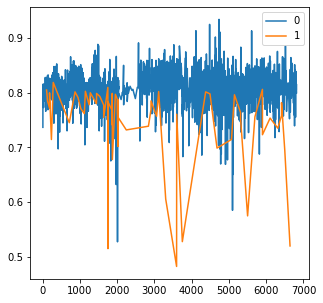

In [50]:
company_data.groupby('Bankrupt')['Net Income to Total Assets'].plot(legend=True, figsize=(5,5))
company_data.groupby('Bankrupt')['Net Income to Total Assets'].describe()

In [51]:
# Answer Question 3.9:

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2364.0,0.840914,0.002673,0.798485,0.840188,0.841205,0.842268,0.849953
1,64.0,0.834819,0.008775,0.798728,0.833053,0.836895,0.839966,0.856906


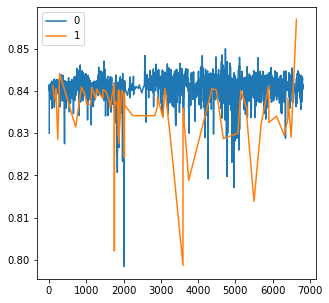

In [52]:
company_data.groupby('Bankrupt')["Net Income to Stockholder's Equity"].plot(legend=True, figsize=(5,5))
company_data.groupby('Bankrupt')["Net Income to Stockholder's Equity"].describe()

In [53]:
# Review further key ratios that should be significantly different for bankrupt company compared to non-bankrupt companies

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2364.0,0.606895,0.009445,0.543141,0.600977,0.605759,0.611920,0.654722
1,64.0,0.600664,0.011384,0.540890,0.596075,0.599352,0.605241,0.626436


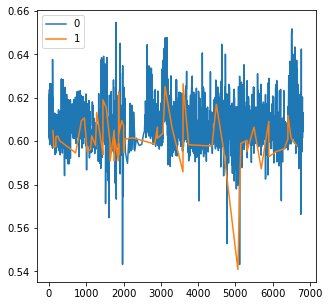

In [54]:
company_data.groupby('Bankrupt')['Gross Profit to Sales'].plot(legend=True, figsize=(5,5))
company_data.groupby('Bankrupt')['Gross Profit to Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2316.0,0.606837,0.008088,0.586347,0.601075,0.605756,0.611773,0.635658
1,62.0,0.601866,0.008379,0.587300,0.596509,0.599858,0.605737,0.626436


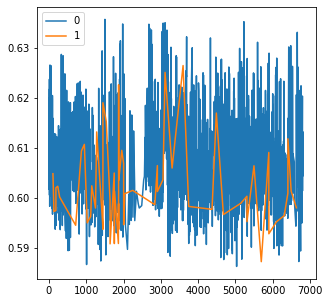

In [55]:
# Remove outliers from 'Gross Profit to Sales' Column
company_data_low = company_data['Gross Profit to Sales'].quantile(0.01)
company_data_hi  = company_data['Gross Profit to Sales'].quantile(0.99)

company_data_filtered = company_data[(company_data['Gross Profit to Sales'] < company_data_hi) & (company_data['Gross Profit to Sales'] > company_data_low)]

company_data_filtered.groupby('Bankrupt')['Gross Profit to Sales'].plot(legend=True, figsize=(5,5))
company_data_filtered.groupby('Bankrupt')['Gross Profit to Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2364.0,0.460668,0.010638,0.315363,0.457468,0.459813,0.463061,0.553951
1,64.0,0.457785,0.003667,0.445536,0.456846,0.458430,0.459585,0.464352


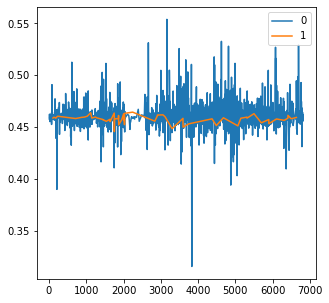

In [56]:
company_data.groupby('Bankrupt')['Cash Flow to Liability'].plot(legend=True, figsize=(5,5))
company_data.groupby('Bankrupt')['Cash Flow to Liability'].describe()

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2314.0,0.460573,0.007452,0.432573,0.457597,0.459813,0.462995,0.495958
1,64.0,0.457785,0.003667,0.445536,0.456846,0.458430,0.459585,0.464352


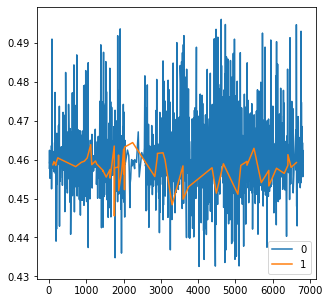

In [57]:
# Remove outliers from 'Cash Flow to Liability' Column
company_data_low = company_data["Cash Flow to Liability"].quantile(0.01)
company_data_hi  = company_data["Cash Flow to Liability"].quantile(0.99)

company_data_filtered = company_data[(company_data["Cash Flow to Liability"] < company_data_hi) & (company_data["Cash Flow to Liability"] > company_data_low)]

company_data_filtered.groupby('Bankrupt')['Cash Flow to Liability'].plot(legend=True, figsize=(5,5))
company_data_filtered.groupby('Bankrupt')['Cash Flow to Liability'].describe()

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2364.0,0.116988,0.005779,0.110934,0.112867,0.115373,0.119283,0.155218
1,64.0,0.120120,0.009459,0.090263,0.113792,0.118276,0.124044,0.149585


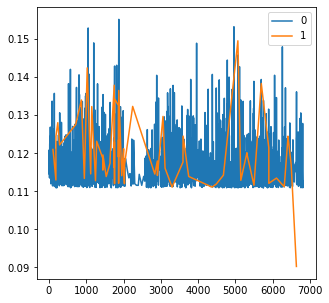

In [58]:
company_data.groupby('Bankrupt')['Equity to Long-term Liability'].plot(legend=True, figsize=(5,5))
company_data.groupby('Bankrupt')['Equity to Long-term Liability'].describe()

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2317.0,0.116783,0.005117,0.110961,0.112903,0.115374,0.119182,0.138303
1,61.0,0.119761,0.007494,0.111108,0.113892,0.117993,0.123555,0.138359


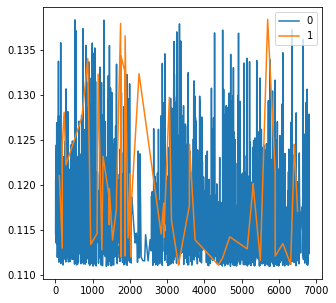

In [59]:
# Remove outliers from ' Liability to Equity' Column
company_data_low = company_data["Equity to Long-term Liability"].quantile(0.01)
company_data_hi  = company_data["Equity to Long-term Liability"].quantile(0.99)

company_data_filtered = company_data[(company_data["Equity to Long-term Liability"] < company_data_hi) & (company_data["Equity to Long-term Liability"] > company_data_low)]

company_data_filtered.groupby('Bankrupt')['Equity to Long-term Liability'].plot(legend=True, figsize=(5,5))
company_data_filtered.groupby('Bankrupt')['Equity to Long-term Liability'].describe()

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2364.0,0.280122,0.003265,0.275498,0.277841,0.279395,0.281492,0.298183
1,64.0,0.285244,0.005678,0.259280,0.282316,0.285197,0.288083,0.296308


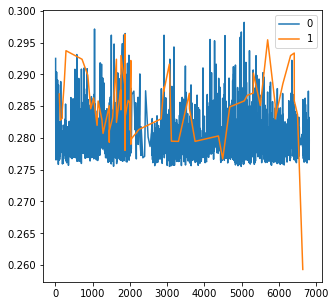

In [60]:
company_data.groupby('Bankrupt')['Liability to Equity'].plot(legend=True, figsize=(5,5))
company_data.groupby('Bankrupt')['Liability to Equity'].describe()

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2322.0,0.280050,0.002971,0.275871,0.277871,0.279405,0.281446,0.292934
1,56.0,0.284604,0.003759,0.276686,0.281809,0.284728,0.287031,0.292375


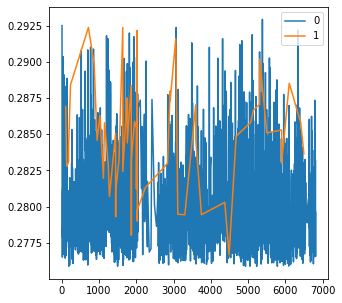

In [61]:
# Remove outliers from ' Liability to Equity' Column
company_data_low = company_data['Liability to Equity'].quantile(0.01)
company_data_hi  = company_data['Liability to Equity'].quantile(0.99)

company_data_filtered = company_data[(company_data['Liability to Equity'] < company_data_hi) & (company_data['Liability to Equity'] > company_data_low)]

company_data_filtered.groupby('Bankrupt')['Liability to Equity'].plot(legend=True, figsize=(5,5))
company_data_filtered.groupby('Bankrupt')['Liability to Equity'].describe()

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2364.0,0.007256,0.008537,0.000237,0.002116,0.004135,0.008942,0.061806
1,64.0,0.002566,0.002773,0.000235,0.000665,0.001521,0.003242,0.012219


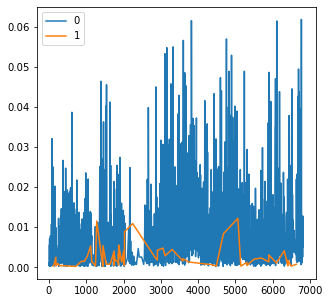

In [62]:
company_data.groupby('Bankrupt')['Cash/Current Liability'].plot(legend=True, figsize=(5,5))
company_data.groupby('Bankrupt')['Cash/Current Liability'].describe()

,count,mean,std,min,25%,50%,75%,max
Bankrupt,,,,,,,,
0,2318.0,0.006855,0.007307,0.000324,0.002153,0.004123,0.008701,0.043748
1,60.0,0.002718,0.002800,0.000345,0.000788,0.001695,0.003741,0.012219


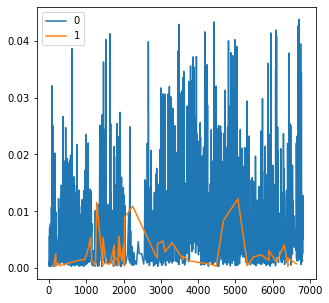

In [63]:
# Remove outliers from 'Cash/Current Liabilities' Column
company_data_low = company_data["Cash/Current Liability"].quantile(0.01)
company_data_hi  = company_data["Cash/Current Liability"].quantile(0.99)

company_data_filtered = company_data[(company_data["Cash/Current Liability"] < company_data_hi) & (company_data["Cash/Current Liability"] > company_data_low)]

company_data_filtered.groupby('Bankrupt')['Cash/Current Liability'].plot(legend=True, figsize=(5,5))
company_data_filtered.groupby('Bankrupt')['Cash/Current Liability'].describe()